In [1]:
import numpy as np
import scipy.stats as stats

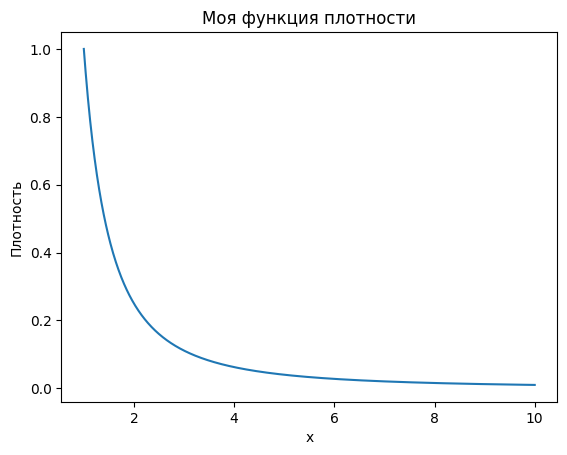

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def my_density(x, etta):
    return (etta - 1) / x ** etta

def my_function(x, etta):
    return x ** (1 - etta)

# Генерируем значения x
x = np.linspace(1, 10, 1000)

# Генерируем значения y (плотность на каждом x)
y = my_density(x, 2)

# Create the plot
plt.plot(x, y)
plt.title('Моя функция плотности')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.show()

In [3]:
# Генерация выборки
np.random.seed(0)
etta = 2

n = 100
sample = np.random.uniform(0, 1, n)
sample = (1 - sample) ** (1 / (1 - etta))

confidence = 0.95
x1 = (1 - confidence) / 2
x2 = (1 + confidence) / 2

In [4]:
med = np.median(sample)
med

np.float64(1.8778762919676302)

In [5]:
B = 100000
bootstrap_samples = np.random.choice(sample, (B, n), replace=True)

# Оценка t как минимального значение распределения
bootstrap_t_estimates = n / np.sum(np.log(bootstrap_samples), axis=1) + 1

# Вычисляем среднее и CI дляt
ci_lower_t = np.round(np.percentile(bootstrap_t_estimates, 2.5), 4)
ci_upper_t = np.round(np.percentile(bootstrap_t_estimates, 97.5), 4)

length_boot_param = np.round(ci_upper_t - ci_lower_t, 4)

print(f'Bootstrap 95% Доверительный интервал для t: ({ci_lower_t}, {ci_upper_t})')
print("Длина: ", length_boot_param)

Bootstrap 95% Доверительный интервал для t: (1.9004, 2.3458)
Длина:  0.4454


In [6]:
B = 100000
bootstrap_samples = np.random.choice(sample, (B, n), replace=True)

est = n / np.sum(np.log(sample)) + 1

# Оценка t как минимального значение распределения
bootstrap_t_estimates = n / np.sum(np.log(bootstrap_samples), axis=1) + 1 - est

# Вычисляем среднее и CI дляt
ci_upper_t = np.round(est - np.percentile(bootstrap_t_estimates, 2.5), 4)
ci_lower_t = np.round(est - np.percentile(bootstrap_t_estimates, 97.5), 4)

length_boot_not_param = np.round(ci_upper_t - ci_lower_t, 4)

print(f'Bootstrap 95% Доверительный интервал для t: ({ci_lower_t}, {ci_upper_t})')
print("Длина: ", length_boot_not_param)

Bootstrap 95% Доверительный интервал для t: (1.83, 2.2773)
Длина:  0.4473


In [7]:
t1 = -1.96
t2 = 1.96


h1 = np.round(med - t2 * (med * np.log(2) * np.log2(med)) / np.sqrt(n), 4)
h2 = np.round(med - t1 * (med * np.log(2) * np.log2(med)) / np.sqrt(n), 4)
confidence_interval = (h1, h2)
length_med = np.round(h2 - h1, 4)


print(f"Средний доверительный интервал (95%): {confidence_interval}")
print("Длина: ", length_med)

Средний доверительный интервал (95%): (np.float64(1.6459), np.float64(2.1098))
Длина:  0.4639


In [8]:
t1 = -1.96
t2 = 1.96

est = n / np.sum(np.log(sample)) + 1

h1 = np.round(est - t2 * (est - 1) / np.sqrt(n), 4)
h2 = np.round(est - t1 * (est - 1) / np.sqrt(n), 4)
confidence_interval = (h1, h2)
length_approx = np.round(h2 - h1, 4)

print(f"Приближённный доверительный интервал (95%): {confidence_interval}")
print("Длина: ", length_approx)

Приближённный доверительный интервал (95%): (np.float64(1.8752), np.float64(2.3019))
Длина:  0.4267


In [9]:
import pandas as pd

data = {"Бутстрап с параметром": length_boot_param, "Бутстрап без параметра": length_boot_not_param, "Приближение": length_approx}
df = pd.DataFrame(data, index=["Длина"]).T

df

,Длина
Бутстрап с параметром,0.4454
Бутстрап без параметра,0.4473
Приближение,0.4267
